<font size="4">Imports </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay


from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# machine learning
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC





<font size="4">Choosing Table </font>

In [2]:
#Tuesday
df_treino = pd.read_csv('/home/jupyter/Jupyter/notebook/share/Dados/10%Wednesday.pcap_ISCX.csv',sep=',')
df_treino.columns = df_treino.columns.str.replace(' ', '')
#Renomear dfs...
df_teste = pd.read_csv('/home/jupyter/Jupyter/notebook/share/Dados/Wednesday-workingHours.pcap_ISCX.csv',sep=',')
df_teste.columns = df_teste.columns.str.replace(' ', '')

In [3]:
df_teste.groupby("Label").count()["DestinationPort"]

Label
BENIGN              440031
DoS GoldenEye        10293
DoS Hulk            231073
DoS Slowhttptest      5499
DoS slowloris         5796
Heartbleed              11
Name: DestinationPort, dtype: int64

<font size="4">Creating binary Target column </font>

In [4]:
df_treino["Target"] = np.where(df_treino['Label'] == 'BENIGN', 0, 1)
df_treino.Target.unique()
df_teste["Target"] = np.where(df_teste['Label'] == 'BENIGN', 0, 1)
df_teste.Target.unique()

array([0, 1])

 <font size="4">Droping Label table </font>

In [5]:
df_treino = df_treino.drop(["Label"], axis=1)
df_treino = df_treino.drop(["TableType"], axis=1)
df_teste = df_teste.drop(["Label"], axis=1)

df_treino.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

 <font size="4">Columns with NULL values </font>

In [6]:
df_treino.isnull().sum()
df_teste.isnull().sum()

DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
                          ..
IdleMean                   0
IdleStd                    0
IdleMax                    0
IdleMin                    0
Target                     0
Length: 79, dtype: int64

 <font size="4">0 = Benign || 1 = Atack </font>

In [7]:
df_teste.groupby("Target").count()["DestinationPort"]

Target
0    440031
1    252672
Name: DestinationPort, dtype: int64

In [8]:
[(c,np.isinf(df_treino[c]).sum()) for c in df_treino.columns]

[('DestinationPort', 0),
 ('FlowDuration', 0),
 ('TotalFwdPackets', 0),
 ('TotalBackwardPackets', 0),
 ('TotalLengthofFwdPackets', 0),
 ('TotalLengthofBwdPackets', 0),
 ('FwdPacketLengthMax', 0),
 ('FwdPacketLengthMin', 0),
 ('FwdPacketLengthMean', 0),
 ('FwdPacketLengthStd', 0),
 ('BwdPacketLengthMax', 0),
 ('BwdPacketLengthMin', 0),
 ('BwdPacketLengthMean', 0),
 ('BwdPacketLengthStd', 0),
 ('FlowBytes/s', 32),
 ('FlowPackets/s', 131),
 ('FlowIATMean', 0),
 ('FlowIATStd', 0),
 ('FlowIATMax', 0),
 ('FlowIATMin', 0),
 ('FwdIATTotal', 0),
 ('FwdIATMean', 0),
 ('FwdIATStd', 0),
 ('FwdIATMax', 0),
 ('FwdIATMin', 0),
 ('BwdIATTotal', 0),
 ('BwdIATMean', 0),
 ('BwdIATStd', 0),
 ('BwdIATMax', 0),
 ('BwdIATMin', 0),
 ('FwdPSHFlags', 0),
 ('BwdPSHFlags', 0),
 ('FwdURGFlags', 0),
 ('BwdURGFlags', 0),
 ('FwdHeaderLength', 0),
 ('BwdHeaderLength', 0),
 ('FwdPackets/s', 0),
 ('BwdPackets/s', 0),
 ('MinPacketLength', 0),
 ('MaxPacketLength', 0),
 ('PacketLengthMean', 0),
 ('PacketLengthStd', 0),
 ('

 <font size="4">Fixing NULL and infinite values </font>

In [9]:
df_treino = df_treino[~df_treino["FlowBytes/s"].isnull()]
df_treino = df_treino[~np.isinf(df_treino["FlowBytes/s"])]
df_treino = df_treino[~np.isinf(df_treino["FlowPackets/s"])]

In [10]:
df_teste = df_teste[~df_teste["FlowBytes/s"].isnull()]
df_teste = df_teste[~np.isinf(df_teste["FlowBytes/s"])]
df_teste = df_teste[~np.isinf(df_teste["FlowPackets/s"])]

 <font size="4">Fixed File</font>

In [11]:
pd.set_option('display.max_rows', len(df_treino.columns))
df_treino.isnull().sum()

DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
TotalLengthofBwdPackets    0
FwdPacketLengthMax         0
FwdPacketLengthMin         0
FwdPacketLengthMean        0
FwdPacketLengthStd         0
BwdPacketLengthMax         0
BwdPacketLengthMin         0
BwdPacketLengthMean        0
BwdPacketLengthStd         0
FlowBytes/s                0
FlowPackets/s              0
FlowIATMean                0
FlowIATStd                 0
FlowIATMax                 0
FlowIATMin                 0
FwdIATTotal                0
FwdIATMean                 0
FwdIATStd                  0
FwdIATMax                  0
FwdIATMin                  0
BwdIATTotal                0
BwdIATMean                 0
BwdIATStd                  0
BwdIATMax                  0
BwdIATMin                  0
FwdPSHFlags                0
BwdPSHFlags                0
FwdURGFlags                0
BwdURGFlags                0
FwdHeaderLengt

In [12]:
df_teste.shape

(691406, 79)

 <font size="4">Retirando teste de treino</font>

In [13]:
teste = df_teste[~df_teste.apply(tuple,1).isin(df_treino.apply(tuple,1))]

In [14]:
teste.shape

(561179, 79)

 <font size="4">Y and X for test and train</font>

In [15]:
y = df_treino['Target']
x = df_treino.drop('Target', axis = 1)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)
print(df_treino.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(69139, 79) (48397, 78) (20742, 78) (48397,) (20742,)


In [16]:
y_validation = teste['Target']
x_validation = teste.drop('Target', axis = 1)

 <font size="4">Fit RandomForest Model</font>

In [17]:
# Revisar... Parametros Tirar atributos zerados 
#Checar top10 variaveis mais importantes

RandomForestModel = RandomForestClassifier(n_estimators=10, random_state=42)
RandomForestModel.fit(x_treino, y_treino)



feature_importances_RandomForestModel = pd.DataFrame(RandomForestModel.feature_importances_,
                                   index = x_treino.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_RandomForestModel)

print('\n\nRandom Forest\n')
random_forest_confusion_matrix = (confusion_matrix(y_teste, RandomForestModel.predict(x_teste)))
random_forest_precision = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[0,1]))
random_forest_recall = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[1,0]))
random_forest_False_Negatives_Rate = (random_forest_confusion_matrix[1,0]/(random_forest_confusion_matrix[1,0]+random_forest_confusion_matrix[1,1]))
random_forest_F1 = ((2*random_forest_precision*random_forest_recall)/(random_forest_precision+random_forest_recall))

print('Confusion_Matrix: \n', random_forest_confusion_matrix)
print('Precision:', random_forest_precision)
print('Recall:', random_forest_recall)
print('False Negatives Rate:', random_forest_False_Negatives_Rate)
print('F1:', random_forest_F1)

                         importance
PacketLengthVariance       0.165231
MaxPacketLength            0.110958
TotalLengthofBwdPackets    0.099130
PacketLengthMean           0.069865
BwdPacketLengthStd         0.068451
DestinationPort            0.055614
BwdPacketLengthMean        0.053176
FwdIATMean                 0.044634
AveragePacketSize          0.026393
Init_Win_bytes_backward    0.024814
FwdPacketLengthMean        0.020607
FwdPacketLengthMax         0.019913
FwdHeaderLength.1          0.019638
SubflowFwdBytes            0.019485
BwdHeaderLength            0.018911
BwdPacketLengthMax         0.017477
Init_Win_bytes_forward     0.015688
FwdIATTotal                0.015074
PacketLengthStd            0.012549
AvgFwdSegmentSize          0.008034
TotalFwdPackets            0.007727
SubflowFwdPackets          0.007521
FlowDuration               0.007169
FlowPackets/s              0.007049
FlowBytes/s                0.006619
SubflowBwdBytes            0.006511
FlowIATMax                 0

In [18]:
#For ROC curve
Y_pred_random_forest = RandomForestModel.predict_proba(x_validation)
Y_pred_random_forest = [c[1] for c in Y_pred_random_forest]



print('\n\nRandom Forest\n')
random_forest_confusion_matrix = (confusion_matrix(y_validation, RandomForestModel.predict(x_validation)))
random_forest_precision = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[0,1]))
random_forest_recall = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[1,0]))
random_forest_False_Negatives_Rate = (random_forest_confusion_matrix[1,0]/(random_forest_confusion_matrix[1,0]+random_forest_confusion_matrix[1,1]))
random_forest_F1 = ((2*random_forest_precision*random_forest_recall)/(random_forest_precision+random_forest_recall))

print('Confusion_Matrix: \n', random_forest_confusion_matrix)
print('Precision:', random_forest_precision)
print('Recall:', random_forest_recall)
print('False Negatives Rate:', random_forest_False_Negatives_Rate)
print('F1:', random_forest_F1)



Random Forest

Confusion_Matrix: 
 [[384573    324]
 [   619 175663]]
Precision: 0.9981589549228068
Recall: 0.996488580796678
False Negatives Rate: 0.00351141920332195
F1: 0.9973230684505308


 <font size="4">Fit Neural Network Model</font>

In [19]:
NeuralNetworkModel = MLPClassifier(#solver = 'adam',
                                 # alpha=1e-5,
                                 # hidden_layer_sizes = (16,8),
                                  #random_state=1,
                                  #max_iter=150
                                )

NeuralNetworkModel.fit(x_treino, y_treino)


#Feature Importance

print('Neural Network\n')
NeuralNetworkMatrix = (confusion_matrix(y_teste, NeuralNetworkModel.predict(x_teste)))
NeuralPrecision = (NeuralNetworkMatrix[1,1]/(NeuralNetworkMatrix[1,1]+NeuralNetworkMatrix[0,1]))
NeuralRecall = (NeuralNetworkMatrix[1,1]/(NeuralNetworkMatrix[1,1]+NeuralNetworkMatrix[1,0]))
NeuralNegativesRate = (NeuralNetworkMatrix[1,0]/(NeuralNetworkMatrix[1,0]+NeuralNetworkMatrix[1,1]))
NeuralF1 = ((2*NeuralPrecision*NeuralRecall)/(NeuralPrecision+NeuralRecall))

print('Confusion_Matrix: \n', NeuralNetworkMatrix)
print('Precision:', NeuralPrecision)
print('Recall:', NeuralRecall)
print('False Negatives Rate:', NeuralNegativesRate)
print('F1:', NeuralF1)


Neural Network

Confusion_Matrix: 
 [[13032    87]
 [  610  7013]]
Precision: 0.9877464788732394
Recall: 0.9199790108881017
False Negatives Rate: 0.0800209891118982
F1: 0.9526591048020104


In [20]:
Y_pred_neural_network = NeuralNetworkModel.predict_proba(x_validation)
Y_pred_neural_network = [c[1] for c in Y_pred_neural_network]


#Feature Importance

print('Neural Network\n')
NeuralNetworkMatrix = (confusion_matrix(y_validation, NeuralNetworkModel.predict(x_validation)))
NeuralPrecision = (NeuralNetworkMatrix[1,1]/(NeuralNetworkMatrix[1,1]+NeuralNetworkMatrix[0,1]))
NeuralRecall = (NeuralNetworkMatrix[1,1]/(NeuralNetworkMatrix[1,1]+NeuralNetworkMatrix[1,0]))
NeuralNegativesRate = (NeuralNetworkMatrix[1,0]/(NeuralNetworkMatrix[1,0]+NeuralNetworkMatrix[1,1]))
NeuralF1 = ((2*NeuralPrecision*NeuralRecall)/(NeuralPrecision+NeuralRecall))

print('Confusion_Matrix: \n', NeuralNetworkMatrix)
print('Precision:', NeuralPrecision)
print('Recall:', NeuralRecall)
print('False Negatives Rate:', NeuralNegativesRate)
print('F1:', NeuralF1)

Neural Network

Confusion_Matrix: 
 [[382333   2564]
 [ 15411 160871]]
Precision: 0.9843118059167253
Recall: 0.9125775745680217
False Negatives Rate: 0.08742242543197831
F1: 0.9470883117418321


 <font size="4">Fit SVC Classifier Model</font>

In [21]:
# svclassifierModel = SVC(max_iter = 200, probability = True)

# svclassifierModel.fit(x_treino, y_treino)


# print('SVC classifier Model\n')
# SVCMatrix = (confusion_matrix(y_teste, svclassifierModel.predict(x_teste)))
# SVCPrecision = (SVCMatrix[1,1]/(SVCMatrix[1,1]+SVCMatrix[0,1]))
# SVCRecall = (SVCMatrix[1,1]/(SVCMatrix[1,1]+SVCMatrix[1,0]))
# SVCNegativesRate = (SVCMatrix[1,0]/(SVCMatrix[1,0]+SVCMatrix[1,1]))
# SVCF1 = ((2*SVCPrecision*SVCRecall)/(SVCPrecision+SVCRecall))

# print('Confusion_Matrix: \n', SVCMatrix)
# print('Precision:', SVCPrecision)
# print('Recall:', SVCRecall)
# print('False Negatives Rate:', SVCNegativesRate)
# print('F1:', SVCF1)

In [22]:
# #For ROC curve
# y_pred_svc = svclassifierModel.predict_proba(x_validation)
# y_pred_svc = [c[1] for c in y_pred_svc]


# print('SVC classifier Model\n')
# SVCMatrix = (confusion_matrix(y_validation, svclassifierModel.predict(x_validation)))
# SVCPrecision = (SVCMatrix[1,1]/(SVCMatrix[1,1]+SVCMatrix[0,1]))
# SVCRecall = (SVCMatrix[1,1]/(SVCMatrix[1,1]+SVCMatrix[1,0]))
# SVCNegativesRate = (SVCMatrix[1,0]/(SVCMatrix[1,0]+SVCMatrix[1,1]))
# SVCF1 = ((2*SVCPrecision*SVCRecall)/(SVCPrecision+SVCRecall))

# print('Confusion_Matrix: \n', SVCMatrix)
# print('Precision:', SVCPrecision)
# print('Recall:', SVCRecall)
# print('False Negatives Rate:', SVCNegativesRate)
# print('F1:', SVCF1)

 <font size="4">Fit LogisticRegression Model</font>

In [23]:
# Revisar parametros
LogisticRegressionModel = LogisticRegression(solver='lbfgs',max_iter=2000)
LogisticRegressionModel.fit(x_treino, y_treino)


print(LogisticRegressionModel.coef_)

print('\nLogistic Regression\n')
logreg_confusion_matrix = (confusion_matrix(y_teste, LogisticRegressionModel.predict(x_teste)))
logreg_precision = (logreg_confusion_matrix[1,1]/(logreg_confusion_matrix[1,1]+logreg_confusion_matrix[0,1]))
logreg_recall = (logreg_confusion_matrix[1,1]/(logreg_confusion_matrix[1,1]+logreg_confusion_matrix[1,0]))
logreg_False_Negatives_Rate = (logreg_confusion_matrix[1,0]/(logreg_confusion_matrix[1,0]+logreg_confusion_matrix[1,1]))
logreg_F1 = ((2*logreg_precision*logreg_recall)/(logreg_precision+logreg_recall))

print('Confusion_Matrix: \n', logreg_confusion_matrix)
print('Precision:', logreg_precision)
print('Recall:', logreg_recall)
print('False Negatives Rate:', logreg_False_Negatives_Rate)
print('F1:', logreg_F1)

[[-1.04920835e-04  6.00412146e-07 -4.75351008e-08 -4.81777364e-08
  -8.30516220e-06 -5.70925912e-08 -4.31207021e-06 -5.86154434e-07
  -1.53180906e-06 -1.45937689e-06 -1.23395583e-06 -1.65709943e-06
  -1.63474503e-06  1.34855107e-07 -2.72535448e-08 -2.09566946e-05
  -4.28337604e-06  4.19768732e-06 -2.04368120e-06  5.09133199e-06
  -6.08717600e-07 -8.15593629e-08 -4.47053400e-07  1.29133268e-06
   9.92525644e-09 -6.88322175e-07  1.69390314e-06 -2.02543716e-06
   1.20548615e-06 -2.54363661e-06 -6.00666949e-10  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.11004199e-06 -1.17160442e-06
   2.29118907e-05 -5.73224049e-05 -6.43949307e-07 -3.98988054e-06
  -1.41471947e-06 -1.29622079e-06  1.21061546e-06  4.46738355e-10
  -6.00666949e-10 -6.71266540e-12 -2.27271341e-09 -1.23734453e-09
  -1.37176739e-09  0.00000000e+00 -6.71266540e-12 -1.54687539e-08
  -1.75356182e-06 -1.53180906e-06 -1.63474503e-06 -1.11004199e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

/home/jupyter/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
Y_pred_logreg =LogisticRegressionModel.predict_proba(x_validation)
Y_pred_logreg = [c[1] for c in Y_pred_logreg]


print('\nLogistic Regression\n')
logreg_confusion_matrix = (confusion_matrix(y_validation, LogisticRegressionModel.predict(x_validation)))
logreg_precision = (logreg_confusion_matrix[1,1]/(logreg_confusion_matrix[1,1]+logreg_confusion_matrix[0,1]))
logreg_recall = (logreg_confusion_matrix[1,1]/(logreg_confusion_matrix[1,1]+logreg_confusion_matrix[1,0]))
logreg_False_Negatives_Rate = (logreg_confusion_matrix[1,0]/(logreg_confusion_matrix[1,0]+logreg_confusion_matrix[1,1]))
logreg_F1 = ((2*logreg_precision*logreg_recall)/(logreg_precision+logreg_recall))

print('Confusion_Matrix: \n', logreg_confusion_matrix)
print('Precision:', logreg_precision)
print('Recall:', logreg_recall)
print('False Negatives Rate:', logreg_False_Negatives_Rate)
print('F1:', logreg_F1)


Logistic Regression

Confusion_Matrix: 
 [[373818  11079]
 [ 22327 153955]]
Precision: 0.9328683786371293
Recall: 0.8733449813367219
False Negatives Rate: 0.12665501866327816
F1: 0.9021258892053112


 <font size="4">ROC curve</font>

In [25]:
r_probs = [0 for _ in range(len(y_teste))]
r_auc = roc_auc_score(y_teste, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_teste, r_probs)


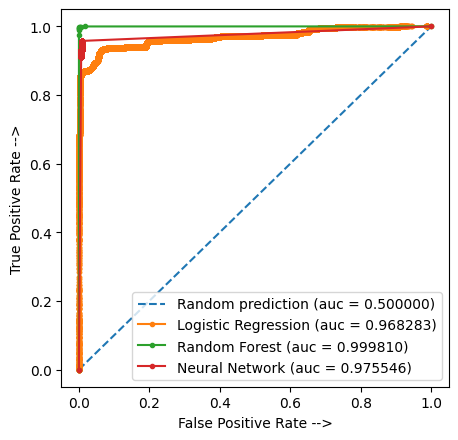

In [26]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_validation, Y_pred_logreg)
auc_logistic = auc(logistic_fpr, logistic_tpr)

Y_pred_random_forest_fpr, Y_pred_random_forest_tpr, threshold = roc_curve(y_validation, Y_pred_random_forest)
auc_Y_pred_random_forest = auc(Y_pred_random_forest_fpr, Y_pred_random_forest_tpr)

Y_pred_neural_network_fpr, Y_pred_neural_network_tpr, threshold = roc_curve(y_validation, Y_pred_neural_network)
auc_Y_pred_neural_network = auc(Y_pred_neural_network_fpr, Y_pred_neural_network_tpr)

#y_pred_svc_fpr, y_pred_svc_tpr, threshold = roc_curve(y_validation, y_pred_svc)
#auc_Y_pred_svc = auc(y_pred_svc_fpr, y_pred_svc_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (auc = %f)' % r_auc)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic Regression (auc = %f)' % auc_logistic)

plt.plot(Y_pred_random_forest_fpr, Y_pred_random_forest_tpr, marker='.', label='Random Forest (auc = %f)' % auc_Y_pred_random_forest)

plt.plot(Y_pred_neural_network_fpr, Y_pred_neural_network_tpr, marker='.', label='Neural Network (auc = %f)' % auc_Y_pred_neural_network)

#plt.plot(y_pred_svc_fpr, y_pred_svc_tpr, marker='.', label='SVC (auc = %f)' % auc_Y_pred_svc)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()